In [2]:
import numpy as np
import itertools

cube = (np.array(list(itertools.product([0, 1], repeat=3))) - 0.5)*2

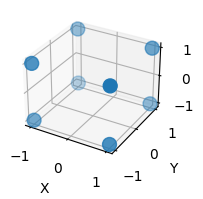

In [3]:
def plot_3_d(cube):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(2,2))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cube[:,0], cube[:,1], cube[:,2], s=100)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_3_d(cube)

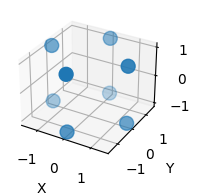

In [4]:
rotation_matrix = np.array([[0.707, -0.707, 0], [0.707, 0.707, 0], [0, 0, 1]])
cube_rot = np.dot(cube, rotation_matrix)
plot_3_d(cube_rot)


In [5]:
# moving these to the camera coordinate frame by a simply +5

cube_cam = cube + 5
cube_rot_cam = cube_rot + 5

In [6]:
# intrinsic camera matrix
import numpy as np

# Intrinsic parameters
fx = 1000.0  # Focal length in the x-direction (horizontal)
fy = 1000.0  # Focal length in the y-direction (vertical)
cx = 640.0   # X-coordinate of the principal point (usually the image center)
cy = 480.0   # Y-coordinate of the principal point (usually the image center)

# Create the intrinsic matrix K as a numpy array
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0, 0, 1]])

print(K)


[[1000.    0.  640.]
 [   0. 1000.  480.]
 [   0.    0.    1.]]


In [7]:
def cam_2_pixels(cube_cam, K):
    uvw_cube = (K@cube_cam.T).T
    uv = (uvw_cube/uvw_cube[:,2].reshape(-1,1))[:,:2]
    return uv

uv_cube = cam_2_pixels(cube_cam, K)
uv_cube

array([[1640.        , 1480.        ],
       [1306.66666667, 1146.66666667],
       [1640.        , 1980.        ],
       [1306.66666667, 1480.        ],
       [2140.        , 1480.        ],
       [1640.        , 1146.66666667],
       [2140.        , 1980.        ],
       [1640.        , 1480.        ]])

In [8]:
uv_rot_cube = cam_2_pixels(cube_rot_cam, K)
uv_rot_cube

array([[1536.5       , 1730.        ],
       [1237.66666667, 1313.33333333],
       [1890.        , 2083.5       ],
       [1473.33333333, 1549.        ],
       [1890.        , 1376.5       ],
       [1473.33333333, 1077.66666667],
       [2243.5       , 1730.        ],
       [1709.        , 1313.33333333]])

In [9]:
cube_cam, cube, uv_cube, cube_rot_cam, cube_rot, uv_rot_cube

(array([[4., 4., 4.],
        [4., 4., 6.],
        [4., 6., 4.],
        [4., 6., 6.],
        [6., 4., 4.],
        [6., 4., 6.],
        [6., 6., 4.],
        [6., 6., 6.]]),
 array([[-1., -1., -1.],
        [-1., -1.,  1.],
        [-1.,  1., -1.],
        [-1.,  1.,  1.],
        [ 1., -1., -1.],
        [ 1., -1.,  1.],
        [ 1.,  1., -1.],
        [ 1.,  1.,  1.]]),
 array([[1640.        , 1480.        ],
        [1306.66666667, 1146.66666667],
        [1640.        , 1980.        ],
        [1306.66666667, 1480.        ],
        [2140.        , 1480.        ],
        [1640.        , 1146.66666667],
        [2140.        , 1980.        ],
        [1640.        , 1480.        ]]),
 array([[3.586, 5.   , 4.   ],
        [3.586, 5.   , 6.   ],
        [5.   , 6.414, 4.   ],
        [5.   , 6.414, 6.   ],
        [5.   , 3.586, 4.   ],
        [5.   , 3.586, 6.   ],
        [6.414, 5.   , 4.   ],
        [6.414, 5.   , 6.   ]]),
 array([[-1.414,  0.   , -1.   ],
        [-1.41

In [ ]:
def gen_data():

    import itertools
    import numpy as np

    cube = (np.array(list(itertools.product([0, 1], repeat=3))) - 0.5)*2
    rotation_matrix = np.array([[0.707, -0.707, 0], [0.707, 0.707, 0], [0, 0, 1]])
    cube_rot = np.dot(cube, rotation_matrix)
    cube_cam = cube + 5
    cube_rot_cam = cube_rot + 5

    # Intrinsic matrix
    fx = 1000.0  # Focal length in the x-direction (horizontal)
    fy = 1000.0  # Focal length in the y-direction (vertical)
    cx = 640.0   # X-coordinate of the principal point (usually the image center)
    cy = 480.0   # Y-coordinate of the principal point (usually the image center)
    K = np.array([[fx, 0, cx],
                  [0, fy, cy],
                  [0, 0, 1]])

    def cam_2_pixels(cube_cam, K):
        uvw_cube = (K@cube_cam.T).T
        uv = (uvw_cube/uvw_cube[:,2].reshape(-1,1))[:,:2]
        return uv

    uv_cube = cam_2_pixels(cube_cam, K)
    uv_rot_cube = cam_2_pixels(cube_rot_cam, K)

    return cube_cam, cube, uv_cube, cube_rot_cam, cube_rot, uv_rot_cube, K

